# Toolbox Demo

This notebook will cover the basic usage of the toolbox to numerically simulate target (nucleus) and incident (proton) objects in the color glass condensate effective field theory. There is an explicit (deprecated) implementation of the method for SU(2) -- since the exponential of a 2x2 matrix has a closed form -- as well as a generic implementation for SU(n) -- which approxmiates this exponential.

The notebook below uses only the generic version; for the explicit SU(2) one, see `TwoColors.py`.

In [1]:
# Import our functions
import cgc

# Import numpy and matplotlib for plotting/other utility
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

# Make our plots nice and large
plt.rcParams["figure.dpi"] = 120
plt.rcParams["font.size"] = 12

## Two Color Demo

This example explores the simplified SU(2) case.

/home/jack/workspaces/jupyter-workspace/ColorGlass/cgc/Collision.py:493: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  derivs = [_x_deriv, _y_deriv]


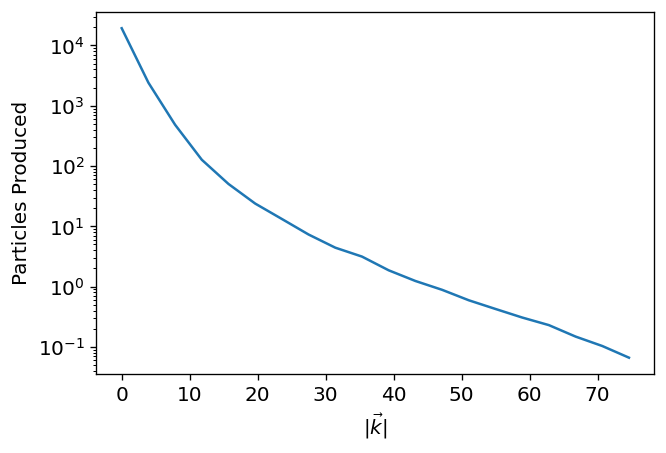

In [2]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
delta = .025
mu = 2
radius = 1

# Create a nucleus and proton object
nucleus = cgc.Nucleus(2, N, delta, mu)
proton = cgc.Proton(2, N, delta, mu, radius)

# Create a collision using these two objects
# The order doesn't matter here, it will determine which is which
# based on which implements wilsonLine()
#col = cgc.Collision(proton, nucleus)
col = cgc.Collision(nucleus, proton)

# Plot the number of particles produced vs. their momenta
# Note that we can calculate the intermediary quantities (eg. the Wilson Line)
# but we don't have to; the number of calculations done will be
# the same either way
plt.plot(col.momentaBins(), col.particlesProduced())
plt.yscale('log')
plt.ylabel('Particles Produced')
plt.xlabel(r'$|\vec k|$')
#plt.savefig('test_su2.png')
plt.show()

## Three Color Demo

Note that the code is almost exactly the same as before, except that we just specify that we are looking at SU(3) instead of SU(2). We can look at some intermediary quantities here as well.

(128, 128, 8)
Calculating Proton gauge field..........finished!
Generating Nucleus color charge field..........finished!
Calculating Nucleus gauge field..........finished!
Calculating Nucleus wilson line..........finished!
Calculating Nucleus adjoint wilson line..........finished!
Calculating Collision omega..........

/home/jack/workspaces/jupyter-workspace/ColorGlass/cgc/Collision.py:493: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  derivs = [_x_deriv, _y_deriv]


finished!
Calculating Collision omega fourier transform..........finished!
Calculating Collision momenta magnitude squared..........finished!
Calculating Collision derivative of particles produced..........finished!
Calculating Collision fourier harmonic: 0..........finished!


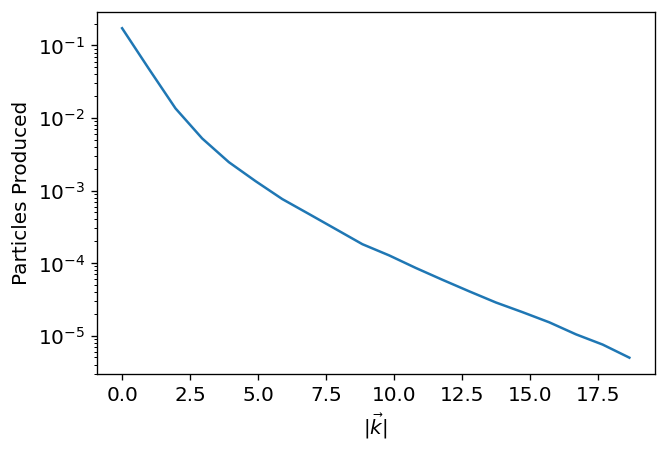

0.24561500868984282


In [2]:
# Constants that define our lattice and color charge distribution
# See documentation for more information
N = 128
delta = .1
muA = 2
muP = 0.25
radius = 4

# Create a nucleus and proton object
nucleus = cgc.Nucleus(3, N, delta, muA, rngSeed=0)
proton = cgc.Proton(3, N, delta, muP, radius, rngSeed=0)

# Create a collision using these two objects
# The order doesn't matter here, it will determine which is which
# based on which implements wilsonLine()
#col = cgc.Collision(proton, nucleus)
col = cgc.Collision(proton, nucleus)

# Plot the number of particles produced vs. their momenta
# Note that we can calculate the intermediary quantities (eg. the Wilson Line)
# but we don't have to; the number of calculations done will be
# the same either way
plt.plot(col.momentaBins(), col.particlesProduced(verbose=1))
plt.yscale('log')
plt.ylabel('Particles Produced')
plt.xlabel(r'$|\vec k|$')
#plt.savefig('test_su_3.png')
plt.show()
print(np.sum(col.particlesProduced()))

(100, 128, 128, 8)
(128, 128, 8)


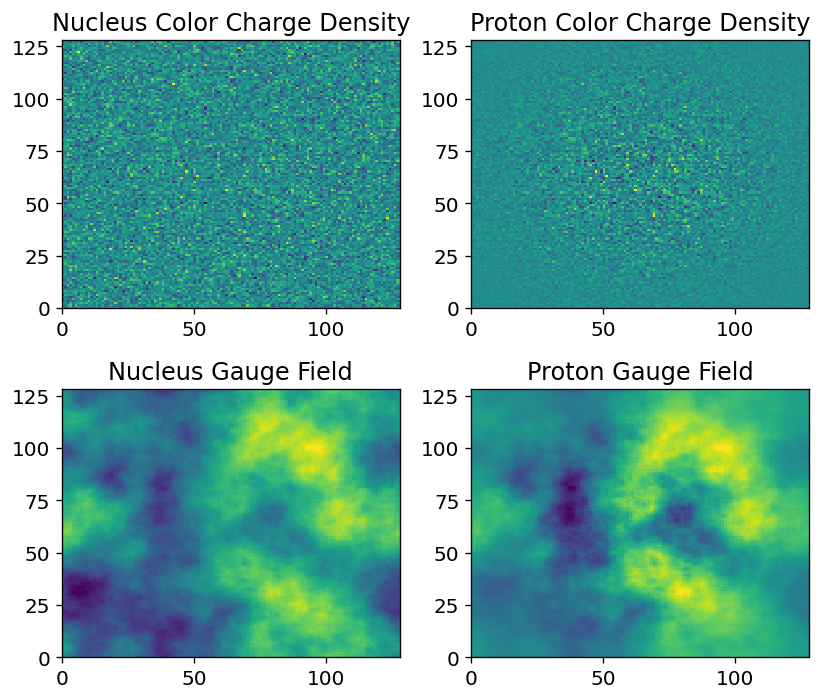

In [7]:
# Let's see what the color density and gauge fields look like
# (Only 2 of them; showing all 8 is a little excessive)
fig, ax = plt.subplots(2, 2, figsize=(7, 6))

print(np.shape(nucleus.gaugeField()))
print(np.shape(proton.gaugeField()))

# We have a total of colorCharges**2 - 1 (8 in this case) fields we could
# look at for the proton, and Ny times that for the nucleus. Feel free to change this up to look at a
# different one (though they should all look the same on average)
fieldSelect = 0
# We also have multiple layers of our nucleus we could look at
layerSelect = 0

ax[0,0].pcolor(nucleus.colorChargeField()[layerSelect,:,:,fieldSelect])
ax[0,0].set_title("Nucleus Color Charge Density")
ax[1,0].pcolor(nucleus.gaugeField()[layerSelect,:,:,fieldSelect])
ax[1,0].set_title("Nucleus Gauge Field")

ax[0,1].pcolor(proton.colorChargeField()[:,:,fieldSelect])
ax[0,1].set_title("Proton Color Charge Density")
ax[1,1].pcolor(proton.gaugeField()[:,:,fieldSelect])
ax[1,1].set_title("Proton Gauge Field")

fig.tight_layout()
plt.show()

(128, 128, 8, 8)


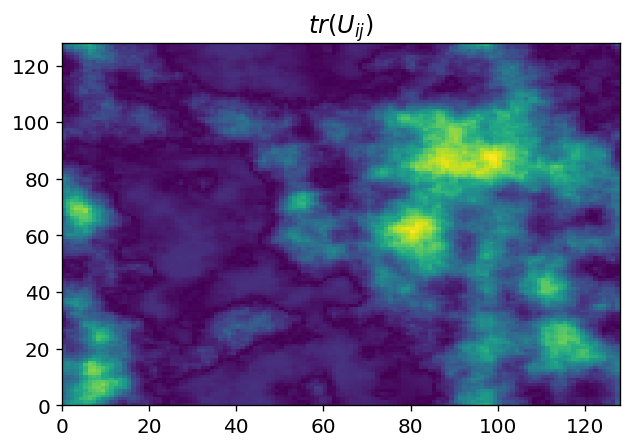

In [12]:
# We can also look at the wilson line (or rather, the trace of it in the adjoint
# representation)
print(np.shape(nucleus.adjointWilsonLine()))
adjointWilsonLineTrace = np.trace(nucleus.adjointWilsonLine(), axis1=-2, axis2=-1)
plt.pcolor(np.abs(adjointWilsonLineTrace))
plt.title(r'$tr(U_{ij})$')
plt.show()

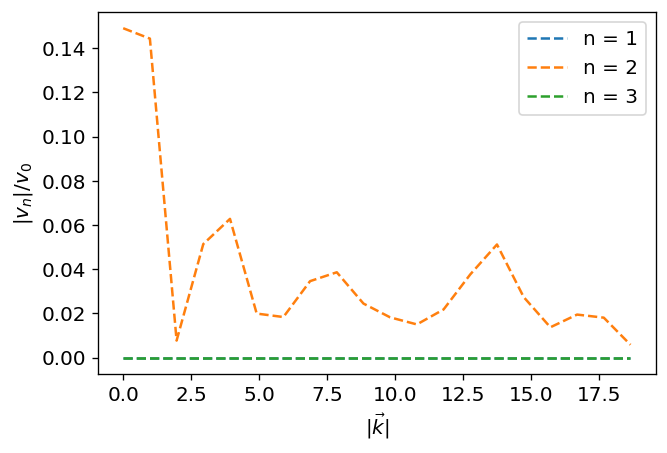

In [9]:
# Now plot a few fourier harmonics
for i in range(1, 4):
    plt.plot(col.momentaBins(), np.abs(col.fourierHarmonic(i)) / np.abs(col.fourierHarmonic(0)), '--', label=f'n = {i}')
#plt.yscale('log')
plt.ylabel(f'$|v_n| / v_0$')
plt.xlabel(r'$|\vec k|$')
plt.legend()
#plt.savefig(f'test_fourier_harmonics_su3.png')
plt.show()
# Odd harmonics are zero, as expected